<h1><b>Introduction to Data Exploration</b></h1>

<p> Before <b>modeling</b> our data, we first preprocess the collected data then explore its corresponding values and data types. In this section, we answer several questions which may be general in nature such as how to deal with null values, data-specific questions such as what is the longest tweet, and statistical questions such as how many are categorized as false or the mean of the data collected. Executed below are the process done in order to explore the data such as preparing the data, using natural language processing, and doing time series analysis onto it. </p>

<p>Before getting started we first import necessary modules for processing the data as well as visualizing it as different graphs.</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<p>We first view the data and some of its features such as what columns have null values.</p>

In [2]:
df = pd.read_csv("Dataset - Group 50 - Data - New.csv")
df = df.iloc[:158]

print(df)
print(df.isnull().sum())

         ID          Timestamp  \
0      50-1  30/03/23 17:28:17   
1      50-2  02/04/23 18:01:07   
2      50-3  29/03/23 18:15:59   
3      50-4  29/03/23 18:39:36   
4      50-5  29/03/23 18:49:57   
..      ...                ...   
153  50-154  17/06/23 19:55:01   
154  50-155  17/06/23 19:55:01   
155  50-156  17/06/23 19:55:01   
156  50-157  17/06/23 19:55:01   
157  50-158  17/06/23 19:55:01   

                                             Tweet URL  Group  \
0    https://twitter.com/AserolfB/status/1242445980...   50.0   
1    https://twitter.com/Alakdan1102Eric/status/114...   50.0   
2    https://twitter.com/Alakdan1102Eric/status/100...   50.0   
3    https://twitter.com/LeeJoseh1/status/100815899...   50.0   
4    https://twitter.com/dozZ3h_Vbril/status/128646...   50.0   
..                                                 ...    ...   
153  https://twitter.com/Nezuko80248176/status/1551...   50.0   
154  https://twitter.com/mcfabsbro/status/155172676...   50.0   
155  h

<h3><b> Handling missing values / ensuring no missing values </b></h3>

<p> In this section, we first try to find all the null values then deal with them using different methods such as dropping the whole column, imputing the general data, deleting the whole row. </p>

<p>Shown below is the several methods used in dealing with these values. As shown in the last code block, data columns that contained null values are the optional <b>Add columns, Reviewer, Review, Account Bio, Tweet translated, Views, Remarks, Location, and Reasoning</b>. For several columns that are optional and had many null values, the team decided to drop these columns by using the drop function. </p>

<p>This was done the same for columns we had no literal use like the <b>Account bio, Tweet translated, Views, Remarks, Location, and Reasoning</b>.</p>

<p>For columns with little null values and may prove to be useful in the research question being discussed by the team, we imputated values into these data column. One example of this is the Quote tweets data column. Since one of the steps the team ensured is to have clean data regarding this data, null values are actually 0 valued datacells. Thus, we decided to impute the value 0 in the null cells in this column. This is also done for the <b>Replies</b> column. </p>

<p>Note as well that a similar step was done for the <b>Rating</b> column wherein the imputated value is the categorical data "False".</p>

In [3]:
df.drop(['Add columns here', 'Add columns here.1', 'Add columns here.2', 'Reviewer', 'Review'], axis = 1, inplace = True)
df.drop(['Account bio', 'Tweet Translated', 'Views', 'Remarks', 'Location', 'Reasoning', 'Screenshot'], axis = 1, inplace = True)
df['Quote Tweets'].fillna(0, inplace = True)
df['Replies'].fillna(0, inplace = True)
df['Rating'].fillna('FALSE', inplace = True)

print(df.isnull().sum())

ID                0
Timestamp         0
Tweet URL         0
Group             0
Collector         0
Category          0
Topic             0
Keywords          0
Account handle    0
Account name      0
Account type      0
Joined            0
Following         0
Followers         0
Tweet             0
Tweet Type        0
Date posted       0
Content type      0
Likes             0
Replies           0
Retweets          0
Quote Tweets      0
Rating            0
dtype: int64


<p> Notice in the results above that when we print out the sum of null values found in the dataset, we get 0 for all the columns. This means that we have dealt with all the null values found in our data set. <p>

<h3><b> Ensuring formatting consistency (Timestamp and Date Posted) </b></h3>


<p> It's also very important to ensure that formatting consistency is attained. This is important because having an inconsistent format may cause the exploratin of the data to have an error or display wrong results. Since the research team ensured that the correct data was inputted in the dataset, the team only ensured that the data type is consistent with its type of data such as the case with the <b><i>Date Posted</i></b> and <b><i>Timestamp</i></b> columns since their values is of timestamp and not strings. Having a wrong datatype may cause the values to be changed accidentally or unwillingly so having a correct datatype is also important in having formatting consistency </p>

<h5>To do this the team just converted its values into the datetime datatype.</h5>

In [4]:
df['Date posted'] = pd.to_datetime(df['Date posted'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Rating'] = df['Rating'].replace('FALSE. MISLEADING', 'FALSE, MISLEADING')
df['Followers'] = df['Followers'].replace('28.3K', '28,300')
df['Followers'] = df['Followers'].replace('20.4K', '20,300')

print(df['Date posted'].dtype)
print(df['Date posted'].head(5))

datetime64[ns]
0   2020-03-24 21:39:00
1   2019-06-21 01:03:00
2   2018-06-17 00:54:00
3   2018-06-17 09:26:00
4   2020-07-24 09:07:00
Name: Date posted, dtype: datetime64[ns]


C:\Users\Fort Bueno\AppData\Local\Temp\ipykernel_3416\3685251170.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date posted'] = pd.to_datetime(df['Date posted'])
C:\Users\Fort Bueno\AppData\Local\Temp\ipykernel_3416\3685251170.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


<p>The results above shows the first 5 data of the Date posted column as well as its datatype. </p>

<h3><b> Categorical Encoding </b></h3>

<p>In this section we do categorical encoding where we convert the categorical values into an integer format so that when we feed this data to the machine learning model we're able to give better results and predictions. There are commonly two commonly used categorical encoding methods called the one hot encoding and the integer encoding. One hot encoding is usually done in categorical values without inherent value such as being high or being low while integer encoding is done for categorical values with order such as high, medium, and low.</p>

<p>Shown below is the process in doing this process. Notice that the team used one hot encoding for both the two categorical data <b>Rating</b> and <b>Content type</b> since the values of this data column doesn't have and inherent ordering in their values. For the content type, the data had at most 1 type of content type while in the rating there were some data that had 2 or more ratings.</p>

In [5]:
from sklearn.preprocessing import MultiLabelBinarizer
df_categorical = df[['ID', 'Content type', 'Rating']].copy()
one_hot = pd.get_dummies(df_categorical['Content type'], prefix = 'Content type')
df_categorical = df_categorical.join(one_hot)


df_categorical['Rating'] = df_categorical['Rating'].str.split(", ")
one_hot = MultiLabelBinarizer()
one_hot = one_hot.fit_transform(df_categorical['Rating'])

df_new = pd.concat([df_categorical, pd.DataFrame(one_hot)], axis = 1)
df_new.columns = ['ID', 'Content type', 'Rating', 'Content type_Emotional', 'Content type_Rational', 'Rating_FAKE', 'Rating_FALSE', 'Rating_MISLEADING', 'Rating_UNPROVEN']
print(df_new.head())



     ID Content type        Rating  Content type_Emotional  \
0  50-1    Emotional       [FALSE]                    True   
1  50-2    Emotional       [FALSE]                    True   
2  50-3    Emotional  [MISLEADING]                    True   
3  50-4     Rational       [FALSE]                   False   
4  50-5    Emotional       [FALSE]                    True   

   Content type_Rational  Rating_FAKE  Rating_FALSE  Rating_MISLEADING  \
0                  False            0             1                  0   
1                  False            0             1                  0   
2                  False            0             0                  1   
3                   True            0             1                  0   
4                  False            0             1                  0   

   Rating_UNPROVEN  
0                0  
1                0  
2                0  
3                0  
4                0  


<p>Shown above is the output for this section. Notice that the values we're changed to 0 and 1 since one hot encoding was used.</p>

<h3><b> Natural Language Processing </b></h3>

<p>After the necessary preprocessing, we move on to natural language processing wherein we standardize in a way all the values in the dataset. For example, in this section we want 'Risa' and 'risa' to be the same value as they mean the same but have different formats. We also change the unnecesarry data such as emoticons by removing symbols and emojis by converting them into words. By doing this, we ensure that every piece of data can be processed for our exploration and modeling.</p>

<p>To start with, we import once again the necessary modules for doing these things such as the re, copy, string, and nltk modules. We also download some necessary database so that the process is done more efficiently.</p>

<p>The code below shows the code for doing this process. Note also that we need a working internet for us to download the databases.</p>

In [6]:
import re
import copy
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Fort
[nltk_data]     Bueno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Fort
[nltk_data]     Bueno\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Fort
[nltk_data]     Bueno\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<h4><b> Removal of emoji and emoticon </b></h4>

<p>In this section of <b>NLP</b>, we standardize the value of the string data by removing the unnecessary symbols as well as converting the emojis into a text. Note that we usually do this for the 'Account bio' column and the 'Tweets' column but since we dropped the account bio column, we don't have to do this for that data column. In addition, this is not exactly part of our main research question but this data may be useful in the data modeling section of the project so we still process this data.</p>

<p>To do this, we separate the handling of the two process by making functions for each of them. The first function is called <b><i>emoji_to_word</i></b> wherein its function is to return a text version of the emoji being fed to this function. To do this, we first get the database for the emojis (note that there are thousands of emojis and not everything may be in the database) so that we know what text to return for that emoji. We then use this database to change the emojis in the data into workable texts/strings.</p>

<p>We do the same process for handling emoticons wherein emoticons are basically just a combination of symbols instead of being graphical like emojis. We get the database for emoticons then read it and remove these from the data rather than converting it since.</p>

<p>The code below shows how this process is done. The output is also shown below.</p> 

In [7]:
#handling emojis
url_emoji = "https://drive.google.com/uc?id=1G1vIkkbqPBYPKHcQ8qy0G2zkoab2Qv4v"
df_emoji = pd.read_pickle(url_emoji)
df_emoji = {v: k for k, v in df_emoji.items()}

def emoji_to_word(text):
  for emot in df_emoji:
    text = re.sub(r'('+emot+')', "_".join(df_emoji[emot].replace(",","").replace(":","").split()), text)
  return text

# handling emoticons
url_emote = "https://drive.google.com/uc?id=1HDpafp97gCl9xZTQWMgP2kKK_NuhENlE"
df_emote = pd.read_pickle(url_emote)

def emote_to_word(text):
    for emot in df_emote:
        text = re.sub(u'('+emot+')', "_".join(df_emote[emot].replace(",","").split()), text)
        text = text.replace("<3", "heart" ) # not included in emoticons database
    return text

tweets = copy.deepcopy(df['Tweet'])
tweets = [emoji_to_word(t) for t in tweets]
tweets = [emote_to_word(t) for t in tweets]

df_tweet = pd.DataFrame({'Original': df['Tweet'], 'Without Emotes': tweets})

print(df_tweet.head(5))

                                            Original  \
0  Risa HONTIVIRUS I will Crown 👑 you  forever Co...   
1  RAPPLER ACCUSES RISA HONTIVEROS of CORRUPTION ...   
2  RISA HONTIVEROS MAY PATTERN NG CORRUPTION\r\n1...   
3  { Alt-text image: Photo showing Risa Hontivero...   
4  sus panahon pa ni Risa Hontiveros  may Corrupt...   

                                      Without Emotes  
0  Risa HONTIVIRUS I will Crown crown you  foreve...  
1  RAPPLER ACCUSES RISA HONTIVEROS of CORRUPTION ...  
2  RISA HONTIVEROS MAY PATTERN NG CORRUPTION\r\n1...  
3  { Alt-text image: Photo showing Risa Hontivero...  
4  sus panahon pa ni Risa Hontiveros  may Corrupt...  


<h4><b>Translating and Lowercasing</b></h4>

<p>In this section of NLP, since we finished converting all the non-characters into workable texts we focus in making the format the same. As mentioned earlier, 'Risa' and 'risa' should be the same so as to make things easier we convert all the characters into a lowercase format. We also know that there are multilingual data from this column so before converting all of these into a lowercase format, we first translate all of it into english and only then that we converted all of the characters into lowercase.</p>

<p>The code below shows this process. Note that we imported a translator so that we can convert the multilingual text into the same language but do note that this is not 100% accurate since there are sometimes contexts in language. The team decided to translate the languages into english since most of the tweets are in english format and filipino format.</p>

<p>The output for the first 5 database is also shown below.</p>



In [8]:
from googletrans import Translator
#translating
translator = Translator()
tweets_eng = [t.text for t in translator.translate(tweets, src='tl', dest='en')]
df_tweet['English'] = tweets_eng

#lowercasing
lowercase = [t.lower() for t in tweets_eng]
lowercase = [t.translate(str.maketrans('', '', string.punctuation)) for t in lowercase]

df_tweet['Cleaned'] = lowercase

print(df_tweet.head(5))

                                            Original  \
0  Risa HONTIVIRUS I will Crown 👑 you  forever Co...   
1  RAPPLER ACCUSES RISA HONTIVEROS of CORRUPTION ...   
2  RISA HONTIVEROS MAY PATTERN NG CORRUPTION\r\n1...   
3  { Alt-text image: Photo showing Risa Hontivero...   
4  sus panahon pa ni Risa Hontiveros  may Corrupt...   

                                      Without Emotes  \
0  Risa HONTIVIRUS I will Crown crown you  foreve...   
1  RAPPLER ACCUSES RISA HONTIVEROS of CORRUPTION ...   
2  RISA HONTIVEROS MAY PATTERN NG CORRUPTION\r\n1...   
3  { Alt-text image: Photo showing Risa Hontivero...   
4  sus panahon pa ni Risa Hontiveros  may Corrupt...   

                                             English  \
0  Risa HONTIVIRUS I will Crown crown you forever...   
1  RAPPLER ACCUSES RISA HONTIVEROS of CORRUPTION ...   
2  RISA HONTIVEROS HAS A PATTERN OF CORRUPTION\r\...   
3  { Alt-text image: Photo showing Risa Hontivero...   
4  Gosh, during the time of Risa Hontiveros, t

<h4><b> Tokenization and Stop words removal </b></h4>

<p>In this section we remove the commonly used words without any real meaning like 'as', 'like', and 'and' which we call stop words. We also tokenize in this section. Tokenizing means that we get the words either by phrase, by sentence, or by word which is important because this can be used in data modeling such as the use of machine learning. Again, though this data column is not of utmost importance in our key question this may serve useful in future processes like data modeling.</p>

<p>To do this, we import the commonly used stopwords and we separate the data into two which are filtered tweets and tokenized tweets. Note that we only did this for the <b><i>Tweets</i></b> data column</p>

In [9]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

tweets_filtered = []
tweets_tokens = []
for tweet in df_tweet['Cleaned']:
  tweet_list = tweet.split()
  filtered_words = [word for word in tweet_list if word.lower() not in stopwords.words('english')] 
  filtered_sentence = ' '.join(filtered_words)
  tweets_filtered.append(filtered_sentence)
  token = word_tokenize(filtered_sentence)
  tweets_tokens.append(token)

df_tweet['Filtered'] = tweets_filtered
df_tweet['Tokenized'] = tweets_tokens

print(df_tweet.head(5))

                                            Original  \
0  Risa HONTIVIRUS I will Crown 👑 you  forever Co...   
1  RAPPLER ACCUSES RISA HONTIVEROS of CORRUPTION ...   
2  RISA HONTIVEROS MAY PATTERN NG CORRUPTION\r\n1...   
3  { Alt-text image: Photo showing Risa Hontivero...   
4  sus panahon pa ni Risa Hontiveros  may Corrupt...   

                                      Without Emotes  \
0  Risa HONTIVIRUS I will Crown crown you  foreve...   
1  RAPPLER ACCUSES RISA HONTIVEROS of CORRUPTION ...   
2  RISA HONTIVEROS MAY PATTERN NG CORRUPTION\r\n1...   
3  { Alt-text image: Photo showing Risa Hontivero...   
4  sus panahon pa ni Risa Hontiveros  may Corrupt...   

                                             English  \
0  Risa HONTIVIRUS I will Crown crown you forever...   
1  RAPPLER ACCUSES RISA HONTIVEROS of CORRUPTION ...   
2  RISA HONTIVEROS HAS A PATTERN OF CORRUPTION\r\...   
3  { Alt-text image: Photo showing Risa Hontivero...   
4  Gosh, during the time of Risa Hontiveros, t

<p>Shown above are the first 5 rows of the database.</p>

<h4><b> Stemming and Lemmatization </b></h4>

<p>Stemming and Lemmatization are both text normalization techniques used in preparing words for processings. Stemming refers to chopping the ends of words and removing derivational affixes. Stemming is usually used in producing variants of the word base which helpfully helps in returning the same value. For example, cleaning should also return the value for clean, cleaned, and cleans. Lemmatization on the other hand refers to the vocabulary instead of just using word reduction to analyze the word's meaning.  </p>

<p>To do this, we first import the stemmer and lemmatizer we are going to use which in this case is the <b>'Porter Stemmer'</b> and <b>'Wordnet Lemmatizer'.</b> We then create two arrays for both the stemmed tweets and the lemmatized tweets. Afterwards, we do the process of stemming and lemmatizing and append these to the array we initialized. We then create another column for these lemmatized and stemmed tweets.</p>

In [10]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Initialize the stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

tweets_stem, tweets_lem = [], []

def stem_lem(text):
  words = text.split()

  # Stem each word
  stemmed_words = [stemmer.stem(word) for word in words]
  
  # Lemmatize each word
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
  
  # Return the stemmed and lemmatized words as a tuple
  tweets_stem.append(stemmed_words)
  tweets_lem.append(lemmatized_words)

  return (stemmed_words, lemmatized_words)


# Process each text in the array
processed_texts = [stem_lem(t) for t in tweets_filtered]
df_tweet['Stemmed'] = tweets_stem
df_tweet['Lemmatized'] = tweets_lem

print(df_tweet.head(5))

                                            Original  \
0  Risa HONTIVIRUS I will Crown 👑 you  forever Co...   
1  RAPPLER ACCUSES RISA HONTIVEROS of CORRUPTION ...   
2  RISA HONTIVEROS MAY PATTERN NG CORRUPTION\r\n1...   
3  { Alt-text image: Photo showing Risa Hontivero...   
4  sus panahon pa ni Risa Hontiveros  may Corrupt...   

                                      Without Emotes  \
0  Risa HONTIVIRUS I will Crown crown you  foreve...   
1  RAPPLER ACCUSES RISA HONTIVEROS of CORRUPTION ...   
2  RISA HONTIVEROS MAY PATTERN NG CORRUPTION\r\n1...   
3  { Alt-text image: Photo showing Risa Hontivero...   
4  sus panahon pa ni Risa Hontiveros  may Corrupt...   

                                             English  \
0  Risa HONTIVIRUS I will Crown crown you forever...   
1  RAPPLER ACCUSES RISA HONTIVEROS of CORRUPTION ...   
2  RISA HONTIVEROS HAS A PATTERN OF CORRUPTION\r\...   
3  { Alt-text image: Photo showing Risa Hontivero...   
4  Gosh, during the time of Risa Hontiveros, t

<p>Shown above are the first 5 rows of the database showing these changes</p>

<h3><b>Data Visualization and Plotting</b></h3>

<p>The next step after preprocessing all the data is to visualize its contents using charts, plots, and other visualizing techniques to present the complex data and represent its relationship, trends, and pattern.</p>

<p>Some of the visualization techniques we used are scatterplots to show the distribution, heatmaps to show corelations, bar graphs to show comparison, and line graphs for comparison.</p>

<h3><b> Plotting </b></h3>

In [11]:
from calendar import month_name as mn
import matplotlib.dates as mdates
import numpy as np

grouped_df = df.groupby('Date posted').size().reset_index(name='count')
grouped_df.set_index(['Date posted'], inplace = True)
count_monthly = grouped_df[['count']].resample('M').sum()


count_monthly['count'] = count_monthly['count'].replace(0, np.NaN)
#nearest interpolation
count_monthly['count_nearest'] = count_monthly['count'].interpolate(method='nearest')
#linear interpolation
count_monthly['count_linear'] = count_monthly['count'].interpolate(method='linear')
#weighted time interpolation
count_monthly['count_time'] = count_monthly['count'].interpolate(method='time')
#fill missing dates using average tweets per month

count_monthly['count_average'] = count_monthly['count'].replace(np.NaN, count_monthly['count'].mean())
count_monthly['count'] = count_monthly['count'].replace(np.NaN, 0)
print(count_monthly.head(5))


             count  count_nearest  count_linear  count_time  count_average
Date posted                                                               
2016-03-31     1.0            1.0           1.0         1.0       1.000000
2016-04-30     1.0            1.0           1.0         1.0       1.000000
2016-05-31     0.0            1.0           1.0         1.0       2.872727
2016-06-30     0.0            1.0           1.0         1.0       2.872727
2016-07-31     0.0            1.0           1.0         1.0       2.872727


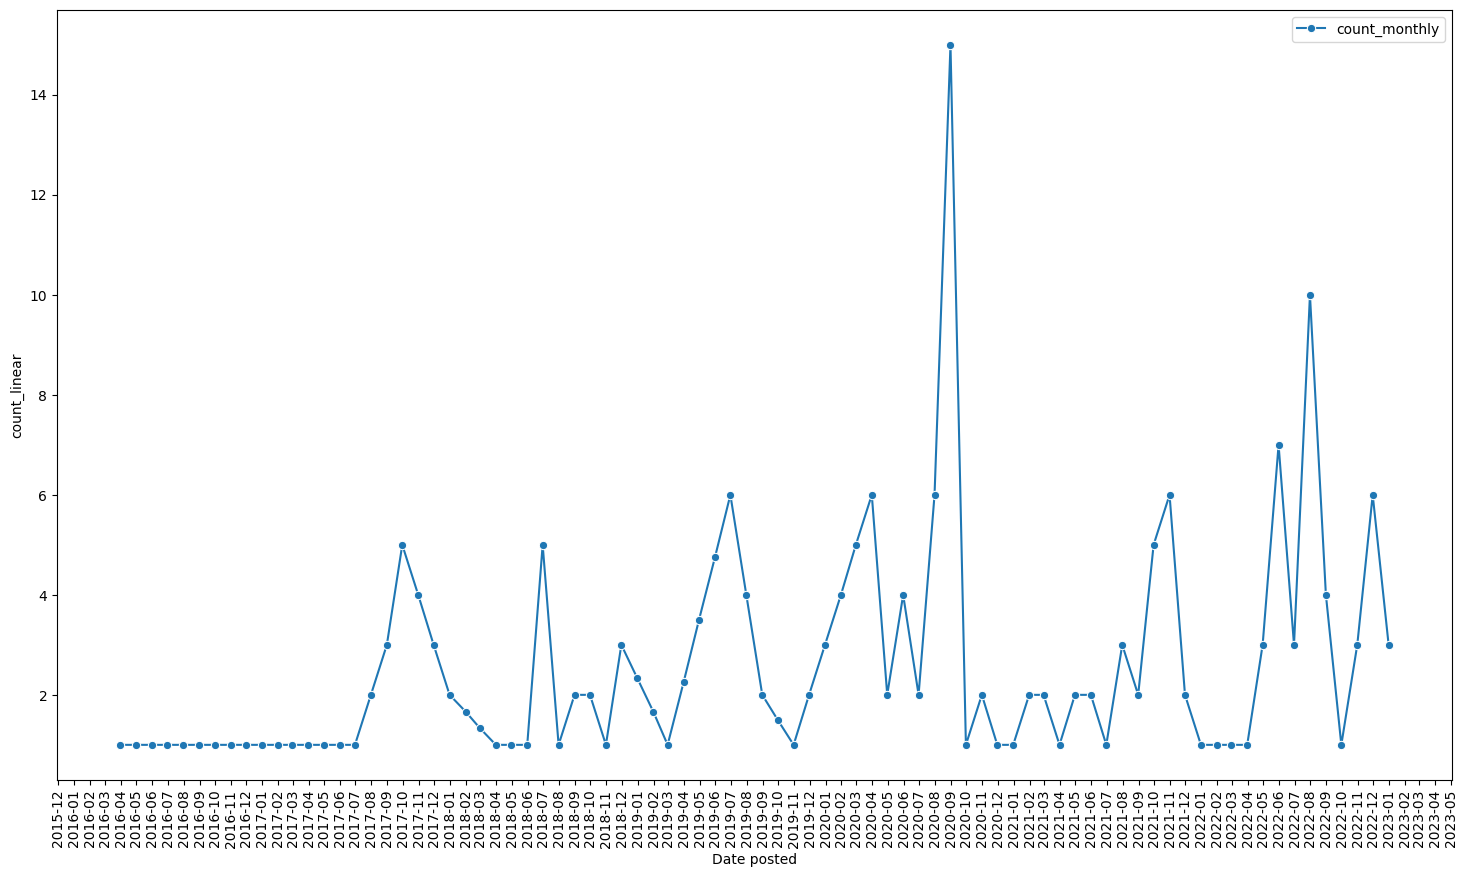

In [12]:
# count_monthly['Year'] = count_monthly.index.year
# months = mn[1:]
# count_monthly['Month'] = count_monthly.index.month
# count_monthly['Month'] = pd.to_datetime(count_monthly['Month'], format = '%m').dt.month_name()
# count_monthly.Month = pd.Categorical(count_monthly.Month, categories= months, ordered=True)

# print(count_monthly)
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y-%m')

fig, axes = plt.subplots(figsize=(18,10))
sns.lineplot(data=count_monthly['count_linear'], label = 'count_monthly', marker = 'o')
axes.xaxis.set_major_locator(months)
axes.xaxis.set_major_formatter(years_fmt)
axes.xaxis.set_minor_locator(months)

plt.xticks(rotation = 'vertical')
plt.show()